In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load MNIST dataset from tensorflow module

import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

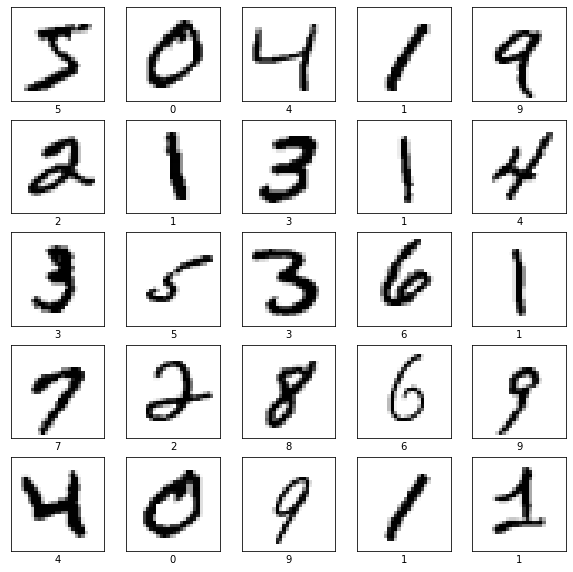

In [3]:
# plot images of the dataset

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [4]:
# reshape/flatten the dataset 
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0] ,x_test.shape[1]*x_test.shape[2])

In [5]:
x_train.shape

(60000, 784)

In [6]:
y_train.shape

(60000,)

In [7]:
# Convert the label from integer to one hot matrix
y_train = np.eye(10)[y_train]
y_train.shape

(60000, 10)

In [8]:
y_test = np.eye(10)[y_test]
y_test.shape

(10000, 10)

In [9]:
# Implementing sigmoid activation function
def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s

In [10]:
# Implementing derivation of sigmoid activation function
def sigmoid_der(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return ds

In [11]:
# calculate the softmax of a vector
def softmax(v):
    max = np.max(v,axis=1,keepdims=True)
    e = np.exp(v-max)
    f = e / np.sum(e,axis=1,keepdims=True)
    return f

In [12]:
# Implementing derivation of softmax activation function

def softmax_der(vector):
    v=softmax(vector)
    return v*(1-v)
    

In [13]:
# Predicting the result of the model on test dataset
def predict(x_test,w1,w2,b1,b2):
    z1=np.dot(x_test,w1)+b1
    a1=sigmoid(z1)
    z2=np.dot(a1,w2)+b2
    a2=softmax(z2)
    
    return a2

In [14]:
# Implement Gradient descent with momentum
def optimizer(w,change,dw):
    new_change = lr * dw + momentum * change
    w = w - new_change
    return w,new_change

In [15]:
# Implemented Categorical cross entropy loss 
def cross_entropy(y_true,y_pred):
    loss=0.0
    l= len(y_true)
    
    loss = (np.sum(-y_true * np.log(y_pred))/l)
    
    return loss

In [16]:
# Calculated Accuracy of the result
def accuracy(y_true,y_pred):
    acc=0.0
    l= len(y_true)
    y_pred = y_pred.round()
    y_true = y_true.round()
    
    acc =(np.sum(y_true * y_pred)/l)
    return acc

In [17]:
def train(x_train,y_train,epochs,nlayer,loss):
    
    # Initializing the weight of the model( 2 layer neural network)
    l=x_train.shape
    w1=np.random.rand(l[1],nlayer)-0.5
    w2=np.random.rand(nlayer,10)-0.5
    b1=np.random.rand(1,nlayer)
    b2=np.random.rand(1,10)
    
    # save the changes required for momentum in gradient descent
    w1_change = 0.0
    w2_change =0.0
    b1_change = 0.0
    b2_change=0.0
    
    
    for i in range(epochs):        
            
        #Forward propagation of the model    
        z1=np.dot(x_train,w1)+b1
        a1=sigmoid(z1)
        z2=np.dot(a1,w2)+b2
        a2=softmax(z2)
        
        #Backward propagation of the model 
        dz2 = a2-y_train
        dw2 = np.dot(a1.T,dz2)/l[0]
        db2 = np.sum(dz2,axis=0,keepdims=True)/l[0]
        dz1 = np.dot(dz2,w2.T)*sigmoid_der(z1)
        dw1 = np.dot(x_train.T,dz1)/l[0]
        db1 = np.sum(dz1,axis=0,keepdims=True)/l[0]
        
        #Gradient Descent with momentum Optimizer to update weights of the model
        w1,w1_change = optimizer(w1,w1_change,dw1)
        w2,w2_change = optimizer(w2,w2_change,dw2)
        b1,b1_change = optimizer(b1,b1_change,db1)
        b2,b2_change = optimizer(b2,b2_change,db2)
        
        
        # Calculate loss on the train and test dataset
        train_loss = cross_entropy(y_train,a2)
        y_pred = predict(x_test,w1,w2,b1,b2)
        test_loss = cross_entropy(y_test,y_pred)
        
        # Calculate accuracy on the train and test dataset
        train_acc=accuracy(y_train,a2)
        test_acc =accuracy(y_test,y_pred)
        
        loss[0].append(train_loss)
        loss[1].append(test_loss)
        print("epoch {} :  Training loss = {:.7} Testing loss = {:.7} Training accuracy = {:.5} Testing accucracy = {:.5}"
              .format(i+1,train_loss,test_loss,train_acc,test_acc))
    
    return w1,w2,b1,b2

In [18]:
loss=[[],[]]
momentum =0.9
lr=1
w1,w2,b1,b2 = train(x_train,y_train,50,128,loss)

epoch 1 :  Training loss = 3.821471 Testing loss = 5.136602 Training accuracy = 0.083233 Testing accucracy = 0.0263
epoch 2 :  Training loss = 5.177278 Testing loss = 7.507431 Training accuracy = 0.027717 Testing accucracy = 0.1035
epoch 3 :  Training loss = 7.552172 Testing loss = 8.88075 Training accuracy = 0.10275 Testing accucracy = 0.2202
epoch 4 :  Training loss = 8.888936 Testing loss = 8.647319 Training accuracy = 0.22173 Testing accucracy = 0.2932
epoch 5 :  Training loss = 8.669685 Testing loss = 6.204666 Training accuracy = 0.28815 Testing accucracy = 0.2541
epoch 6 :  Training loss = 6.279373 Testing loss = 3.385749 Training accuracy = 0.24465 Testing accucracy = 0.2878
epoch 7 :  Training loss = 3.422003 Testing loss = 2.790407 Training accuracy = 0.29097 Testing accucracy = 0.2632
epoch 8 :  Training loss = 2.794373 Testing loss = 2.10805 Training accuracy = 0.26783 Testing accucracy = 0.2367
epoch 9 :  Training loss = 2.108812 Testing loss = 1.749254 Training accuracy = 

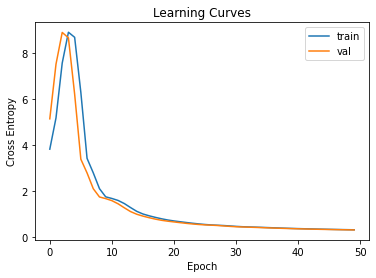

In [19]:
#plot the training and validation loss on the train dataset
from matplotlib import pyplot
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(loss[0], label='train')
pyplot.plot(loss[1], label='val')
pyplot.legend()
pyplot.show()

In [20]:
y_pred = predict(x_test,w1,w2,b1,b2)
matrix = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       980
           1       0.98      0.98      0.98      1135
           2       0.89      0.90      0.89      1032
           3       0.87      0.90      0.89      1010
           4       0.91      0.91      0.91       982
           5       0.89      0.83      0.86       892
           6       0.93      0.93      0.93       958
           7       0.93      0.91      0.92      1028
           8       0.86      0.86      0.86       974
           9       0.88      0.88      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### Save the weights of the model

In [21]:
weight =[w1,w2,b1,b2]
import pickle

with open('weight_file', 'wb') as fp:
    pickle.dump(weight, fp)

In [22]:
with open ('weight_file', 'rb') as fp:
    weight = pickle.load(fp)

In [23]:
# Check on the random dataset
test = x_test[5]
label = y_test[5]
pred = predict(test,weight[0],weight[1],weight[2],weight[3])
print("True result is {}    Predicted Result is {}".format(np.argmax(label),np.argmax(pred)))

True result is 1    Predicted Result is 1
